# TITLE: 
## Predictive Modelling for COVID-19 in Public Health
***BY MICHAEL MGBEDORO IZUCHUKWU***

### **Objective of the Project**

The primary objective of this project is to develop a **predictive modeling system** to assist public health organizations, like *HealthGuard Analytics*, in effectively analyzing and predicting COVID-19 trends. The model aims to provide actionable insights that enable data-driven decision-making for the following purposes:

1. **Understand Key Factors Influencing COVID-19**:
   - Analyze relationships between critical metrics such as *Active Ratio*, *Recovery Rate*, and *Case Fatality Rate* to uncover patterns and identify regions at higher risk.

2. **Classify Regions by COVID-19 Severity**:
   - Use classification models to predict whether a region has a high or low number of cases based on selected features, enabling targeted interventions.

3. **Forecast and Monitor Growth Trends**:
   - Use engineered features like *Weekly Growth Rate* to track trends in virus transmission and identify regions with increasing cases for proactive measures.

4. **Support Resource Allocation**:
   - Provide insights on where to direct healthcare resources, such as ventilators and vaccines, by identifying areas with higher active cases and lower recovery rates.

5. **Inform Public Health Policy**:
   - Deliver recommendations based on model predictions to help policymakers implement containment strategies and allocate resources efficiently.

By achieving these objectives, the project contributes to better pandemic management and enhances preparedness for future outbreaks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Loading the Dataset


- **Here I loaded and displayed the datasets.**

### First Dataset

In [2]:
df = pd.read_csv(r"country_wise_latest.csv")
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


## Data Preprocessing
- **Clening**
    - ***Check for missing values***
    - ***Check for duplicate rows***
    - ***Summerize the data using .info()***
    
- **Transformation**
    - Normalize data for machine learning models 
    - ensure consistency across all numerical features.
    
- **Feature Engineering:**
    - Create derived variables, such as daily growth rates, mortality ratios, and cases per population to enrich the dataset and strengthen model insights.

In [3]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [4]:
# CHECKING FOR DUPLICATES
df[df.duplicated()]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

### OBSERVATION:

- **Cleaning**
    - **NON-NULL CELLS**: I can see that there are no empty cells.
    - **NO DPLICATE CELLS**: I can see that there are no duplicate cells.

- **Transformation**
    - **CORRECT DATATYPES**: I can also see that the all columns are in the appropriate datatypes.

## Feature Engineering

In [6]:
# lETS SEE ALL THE COLUMNS TO WORK WITH.
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [7]:
# Feature Engineering
# Adding new columns for better insights
df['Active Ratio'] = (df['Active'] / df['Confirmed']).fillna(0)
df['Case Fatality Rate'] = (df['Deaths'] / df['Confirmed']).fillna(0)
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']).fillna(0)
df['Weekly Growth Rate'] = (df['1 week % increase'] / 100).fillna(0)
df['New Cases per 100k'] = (df['New cases'] / (df['Confirmed'] + 1)) * 100000  # Avoid division by zero
df['Weekly Death Rate Change'] = ((df['Deaths / 100 Cases'] - 
                                     (df['Confirmed last week'] * df['Deaths / 100 Cases'] / df['Confirmed']))
                                    ).fillna(0)

# Display dataset with new features
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,Confirmed last week,1 week change,1 week % increase,WHO Region,Active Ratio,Case Fatality Rate,Recovery Rate,Weekly Growth Rate,New Cases per 100k,Weekly Death Rate Change
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,...,35526,737,2.07,Eastern Mediterranean,0.270138,0.034994,0.694868,0.0207,292.300904,0.071133
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,...,4171,709,17.00,Europe,0.407992,0.029508,0.562500,0.1700,2397.049785,0.428596
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,...,23691,4282,18.07,Africa,0.285025,0.041576,0.673399,0.1807,2202.044756,0.636797
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,...,884,23,2.60,Europe,0.057332,0.057332,0.885336,0.0260,1101.321586,0.145303
4,Angola,950,41,242,667,18,1,0,4.32,25.47,...,749,201,26.84,Africa,0.702105,0.043158,0.254737,0.2684,1892.744479,0.914021


In [8]:
# LETS SEE THE TABLE OF ALL THE FEATURED ENGINEERING RESULT
df[['Country/Region', 'Case Fatality Rate', 'Recovery Rate', 'Weekly Death Rate Change', 'Weekly Growth Rate', 'Active Ratio', 'New Cases per 100k']]

,Country/Region,Case Fatality Rate,Recovery Rate,Weekly Death Rate Change,Weekly Growth Rate,Active Ratio,New Cases per 100k
0,Afghanistan,0.034994,0.694868,0.071133,0.0207,0.270138,292.300904
1,Albania,0.029508,0.562500,0.428596,0.1700,0.407992,2397.049785
2,Algeria,0.041576,0.673399,0.636797,0.1807,0.285025,2202.044756
3,Andorra,0.057332,0.885336,0.145303,0.0260,0.057332,1101.321586
4,Angola,0.043158,0.254737,0.914021,0.2684,0.702105,1892.744479
...,...,...,...,...,...,...,...
182,West Bank and Gaza,0.007344,0.353262,0.117188,0.1912,0.639394,1430.992280
183,Western Sahara,0.100000,0.800000,0.000000,0.0000,0.100000,0.000000
184,Yemen,0.285630,0.492608,1.216038,0.0445,0.221762,591.016548
185,Zambia,0.030756,0.618409,0.829543,0.3686,0.350835,1559.411377


***COLUMN DESCRIPTION***
- Case Fatality Rate: Proportion of deaths relative to confirmed cases.
- Recovery Rate: Proportion of recoveries relative to confirmed cases.
- Weekly Death Rate Change: Difference in death rate compared to the previous week.
- Weekly Growth Rate: Weekly percentage increase in confirmed cases.
- Active Ratio: Proportion of active cases relative to confirmed cases.
- New Cases per 100k: Rate of new cases per 100,000 population for better comparability.


## Exploratory Data Analysis (EDA)

- ***20 COUNTRIES WITH THE HIGHEST DEATH RATE***
- ***20 COUNTRIES WITH THE LOWEST DEATH RATE***

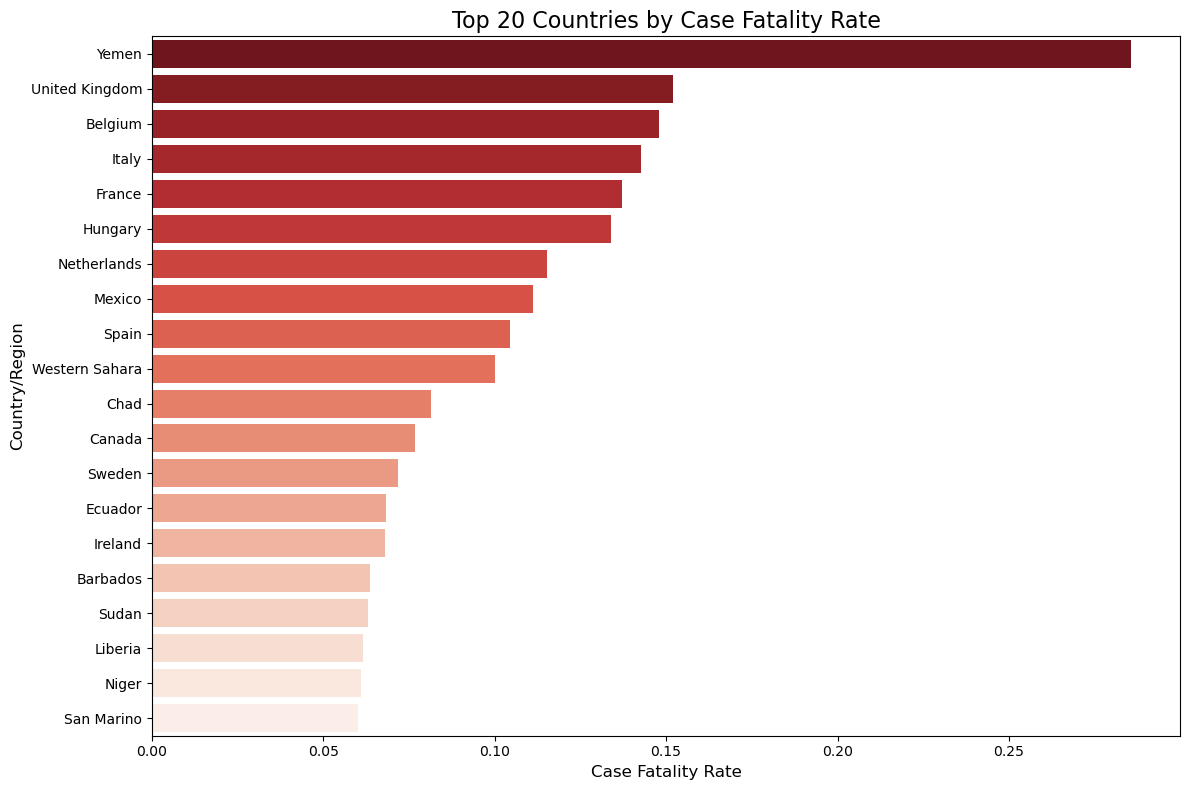

In [9]:


# Sort data by Case Fatality Rate in descending order and select the top 20 countries
top_20_fatality = df[['Country/Region', 'Case Fatality Rate']].sort_values(
    by='Case Fatality Rate', ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Case Fatality Rate', y='Country/Region', data=top_20_fatality, palette='Reds_r')
plt.title('Top 20 Countries by Case Fatality Rate', fontsize=16)
plt.xlabel('Case Fatality Rate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()




**Explanation of the Plot:**
- **Bar Chart:** The horizontal bar chart shows the top 20 countries with the highest Case Fatality Rate (deaths per confirmed cases).
- **Fatality Rate Interpretation:** A higher bar indicates a higher proportion of deaths compared to confirmed cases.
- **Insights:**
    - Countries with the highest fatality rates could be experiencing challenges such as overwhelmed healthcare systems, delayed case reporting, or higher proportions of vulnerable populations (e.g., elderly).
    - This plot helps identify which countries require priority intervention for reducing COVID-19-related deaths.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Eritrea'),
  Text(0, 1, 'Mongolia'),
  Text(0, 2, 'Cambodia'),
  Text(0, 3, 'Bhutan'),
  Text(0, 4, 'Saint Lucia'),
  Text(0, 5, 'Seychelles'),
  Text(0, 6, 'Papua New Guinea'),
  Text(0, 7, 'Grenada'),
  Text(0, 8, 'Greenland'),
  Text(0, 9, 'Holy See'),
  Text(0, 10, 'Timor-Leste'),
  Text(0, 11, 'Dominica'),
  Text(0, 12, 'Vietnam'),
  Text(0, 13, 'Fiji'),
  Text(0, 14, 'Saint Kitts and Nevis'),
  Text(0, 15, 'Saint Vincent and the Grenadines'),
  Text(0, 16, 'Laos'),
  Text(0, 17, 'Singapore'),
  Text(0, 18, 'Qatar'),
  Text(0, 19, 'Uganda')])

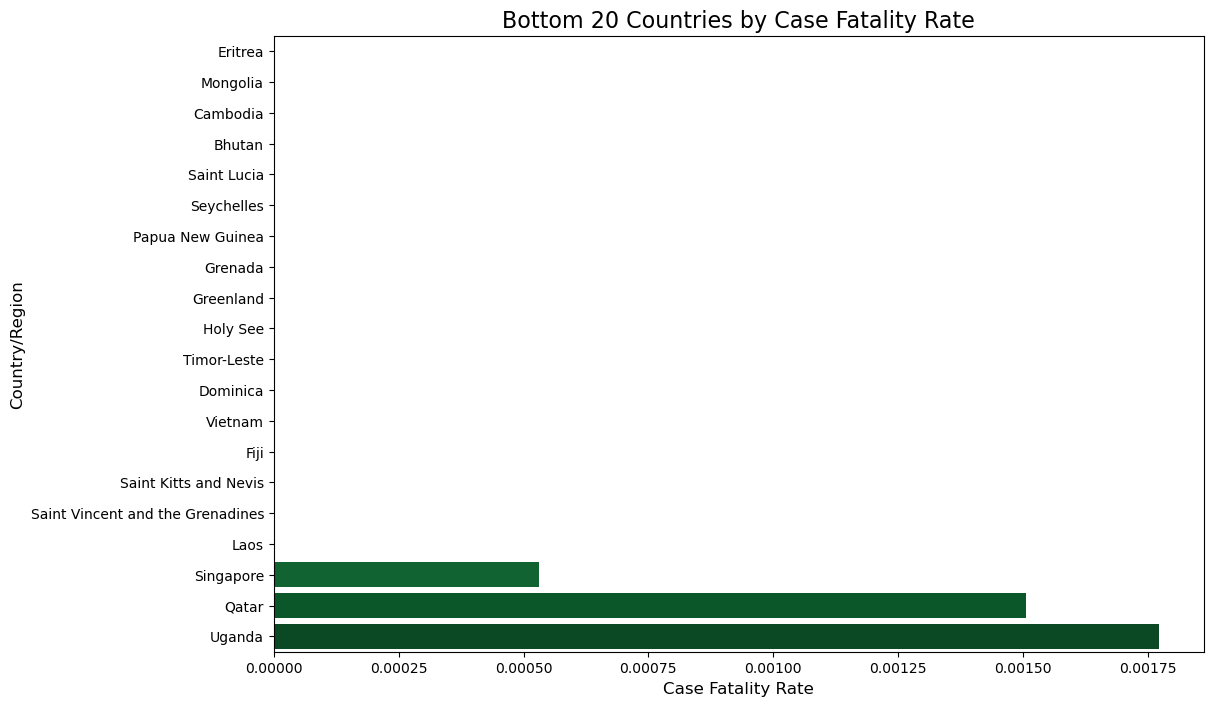

In [10]:

# Sort data by Case Fatality Rate in ascending order and select the bottom 20 countries
bottom_20_fatality = df[['Country/Region', 'Case Fatality Rate']].sort_values(
    by='Case Fatality Rate', ascending=True).head(20)


# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Case Fatality Rate', y='Country/Region', data=bottom_20_fatality, palette='Greens')
plt.title('Bottom 20 Countries by Case Fatality Rate', fontsize=16)
plt.xlabel('Case Fatality Rate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

**Explanation of the Plot:**
- **Bar Chart:** This horizontal bar chart displays the 20 countries with the lowest Case Fatality Rate.
Fatality Rate Interpretation: A lower bar indicates a smaller proportion of deaths compared to confirmed cases.
- **Insights:**
    - Countries in this category may have effective healthcare systems, timely treatment, or younger populations with fewer comorbidities.
    - These countries serve as potential benchmarks for others aiming to reduce their fatality rates.

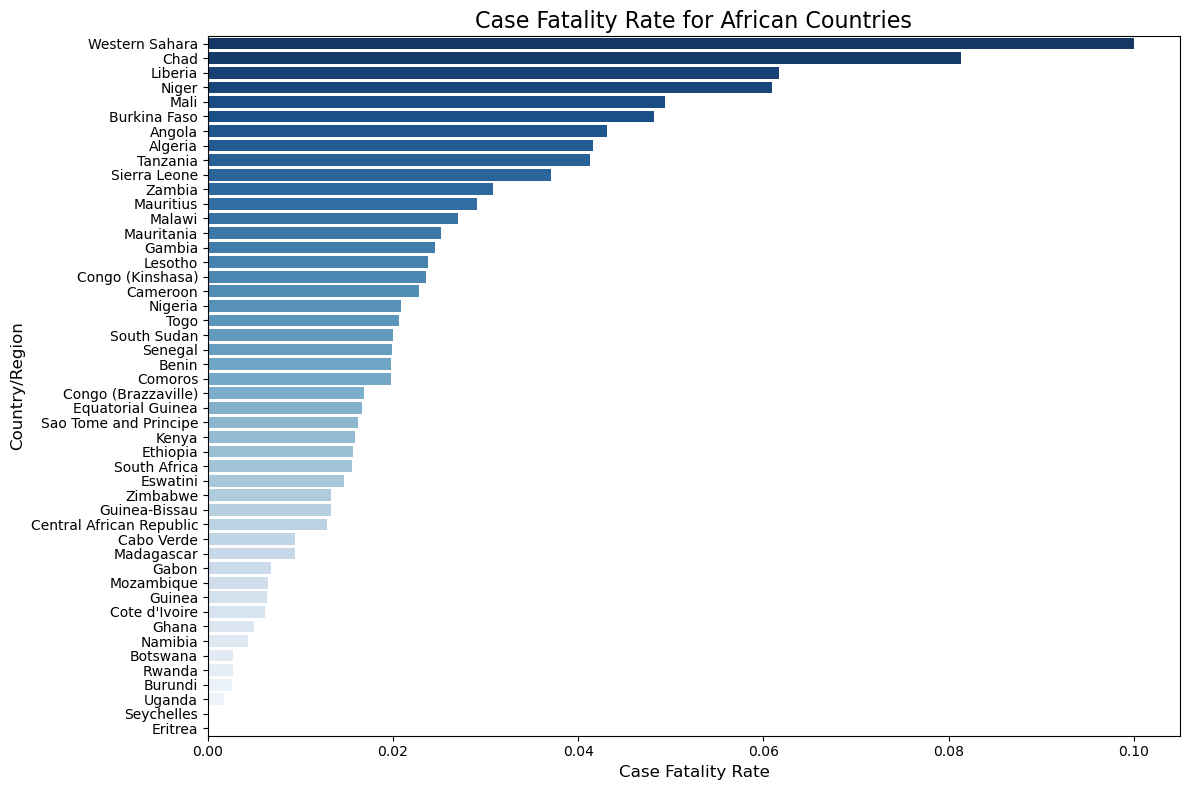

In [11]:
# Filter data for African countries
africa_data = df[df['WHO Region'] == 'Africa']

# Sort by Case Fatality Rate in descending order
africa_fatality = africa_data[['Country/Region', 'Case Fatality Rate']].sort_values(
    by='Case Fatality Rate', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Case Fatality Rate', y='Country/Region', data=africa_fatality, palette='Blues_r')
plt.title('Case Fatality Rate for African Countries', fontsize=16)
plt.xlabel('Case Fatality Rate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Explanation of the Plot:**
- **Bar Chart:** The chart highlights Case Fatality Rate for African countries.
- **Insights:**

    - The countries with the highest fatality rates in Africa are at the top of the chart.
    
    - This can help focus on regions within the continent where fatalities are relatively higher, indicating a need for additional health resources or interventions.

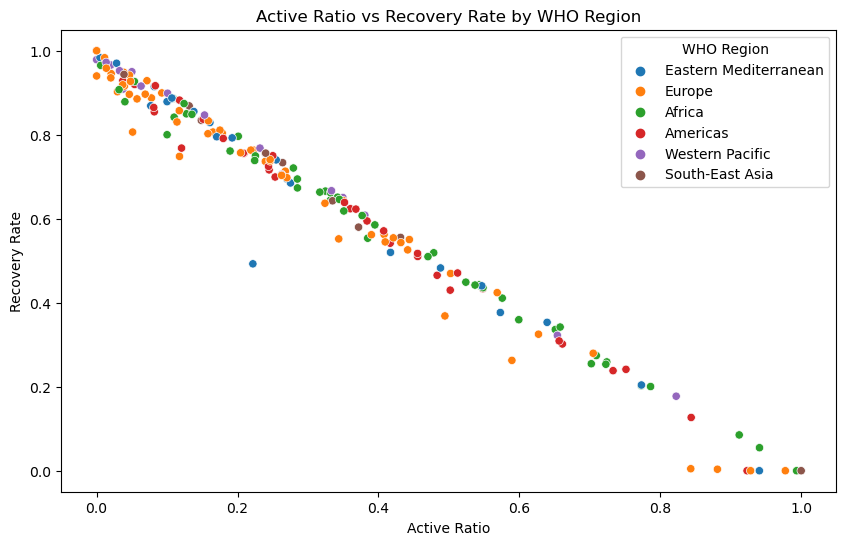

In [12]:
# Visualization: Active Ratio vs Recovery Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active Ratio', y='Recovery Rate', hue='WHO Region', data=df)
plt.title('Active Ratio vs Recovery Rate by WHO Region')
plt.show()



**Insights from EDA:**
* **Scatter Plot:** Active Ratio vs Recovery Rate by WHO Region
* **Trend:** A negative correlation is observed between the Active Ratio and the Recovery Rate:
    - Countries with higher recovery rates tend to have lower active case ratios, suggesting effective containment or treatment strategies.
* **WHO Region Clusters:**
    - Certain WHO regions (e.g., Europe and Western Pacific) show higher recovery rates compared to others, such as Africa and the Americas.
    - This could indicate disparities in healthcare systems, availability of resources, or timing of interventions.
* **Outliers:**
    - Some countries have extremely high active ratios and low recovery rates, likely due to ongoing outbreaks or overwhelmed healthcare systems.

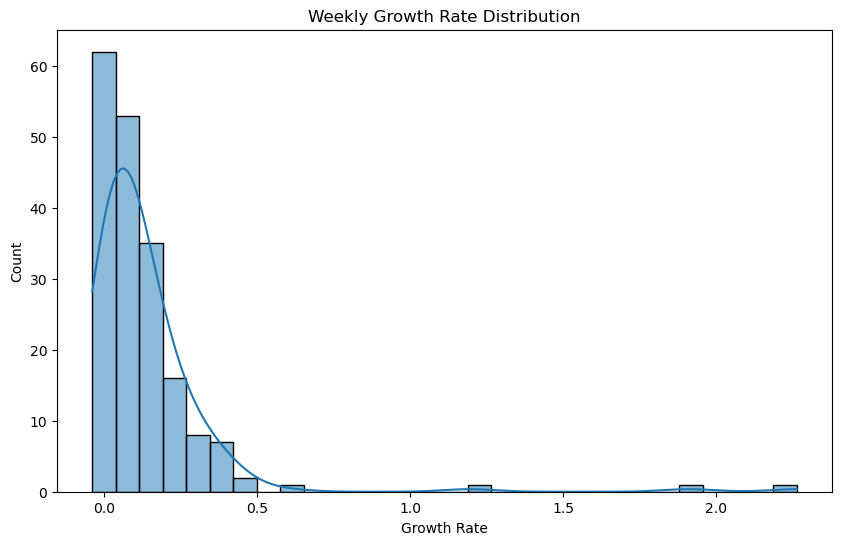

In [13]:
# Visualization: Weekly Growth Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly Growth Rate'], kde=True, bins=30)
plt.title('Weekly Growth Rate Distribution')
plt.xlabel('Growth Rate')
plt.show()

**Histogram: Weekly Growth Rate Distribution**
* **Shape:** The distribution is right-skewed, indicating most countries experience low weekly growth rates, while a few experience rapid increases.
* **High-Growth Regions:**
    - The tail of the distribution highlights countries with high weekly growth rates, often those facing active outbreaks or with lower vaccine coverage.
* **Policy Implications:**
    - These high-growth countries should be prioritized for resource allocation, containment measures, and vaccination campaigns.
* **Low-Growth Regions:**
    - Countries with consistent low weekly growth rates suggest effective long-term control measures and immunity development (via vaccination or natural exposure).

### Feature and Target Preparation

In [14]:
median_threshold = df['New Cases per 100k'].median()
df['High Cases'] = (df['New Cases per 100k'] > median_threshold).astype(int)

# Features (X) and target (y)
X = df[['Active Ratio', 'Case Fatality Rate', 'Recovery Rate', 'Weekly Growth Rate']]
y = df['High Cases']

### Train-Test Split

In [15]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train a Classification Model

In [16]:

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68        25
           1       0.47      0.69      0.56        13

    accuracy                           0.63        38
   macro avg       0.63      0.65      0.62        38
weighted avg       0.68      0.63      0.64        38


Confusion Matrix:
[[15 10]
 [ 4  9]]


**Metrics Explained:**
- **Precision:**

    - Class 0 (Low Cases): 0.79 means that when the model predicts "Low Cases," 79% of the predictions are correct.
    - Class 1 (High Cases): 0.47 means that when the model predicts "High Cases," only 47% of the predictions are correct.
    - Precision is lower for High Cases, indicating more false positives (incorrect predictions of High Cases).
    
- **Recall:**

    - Class 0 (Low Cases): 0.60 means that the model correctly identifies 60% of the actual Low Cases.
    - Class 1 (High Cases): 0.69 means that the model correctly identifies 69% of the actual High Cases.
    - Recall is better for High Cases, meaning the model captures more true positives but at the cost of more false positives.
    
- **F1-Score:**

    - Combines precision and recall into a single metric.
    - Class 0 (Low Cases): 0.68 shows the balance between precision and recall for predicting Low Cases.
    - Class 1 (High Cases): 0.56 indicates a lower balance for High Cases, likely due to poor precision.
    
- **Accuracy:**

    - Overall, the model correctly predicts 63% of the test data.
    
- **Macro Avg:**

    - The unweighted average of precision, recall, and F1-score across both classes.
- Values around 0.63 to 0.65 reflect moderate performance but suggest room for improvement, especially for the minority class (1).

- **Weighted Avg:**

    - Takes into account the support (number of instances) of each class.
    - Values like 0.68 (precision) and 0.64 (F1-score) show that the majority class (Low Cases) dominates the performance metrics.

**Insights:**
- Imbalanced Performance:

    - The model performs better on Class 0 (Low Cases) than on Class 1 (High Cases), likely because Low Cases are more frequent in the data (class imbalance).
- High False Positives for High Cases:

    - The low precision for High Cases indicates that the model often misclassifies Low Cases as High Cases.
- Overall Moderate Accuracy:

    - An accuracy of 63% indicates the model is somewhat effective but far from perfect.

### Feature Importance Visualization

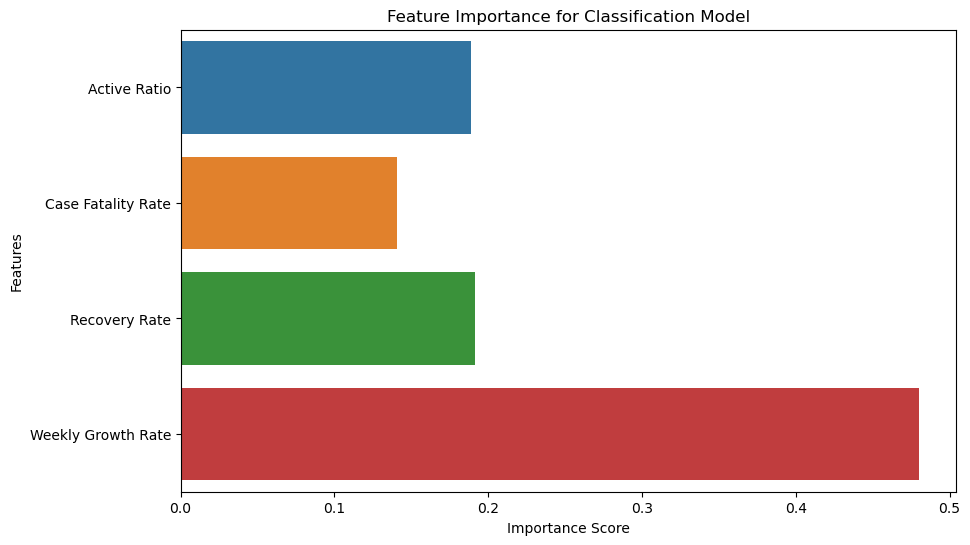

In [18]:
# Plot feature importance

importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Classification Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Visualizing the importance of each feature in predicting High Cases shows that Weekly Growth Rate is very important in  for predicting high cases.


### Testing the Model with an Input

In [19]:
# Example input data: Replace these values with actual test values
test_input = {
    'Active Ratio': 0.15,
    'Case Fatality Rate': 2.5,
    'Recovery Rate': 95.0,
    'Weekly Growth Rate': 1.2
}

# Convert the test input into a DataFrame
import pandas as pd
test_input_df = pd.DataFrame([test_input])

# Make a prediction
test_prediction = clf.predict(test_input_df)
test_prediction_proba = clf.predict_proba(test_input_df)

# Display the prediction
print(f"Predicted Class (High Cases=1, Low Cases=0): {test_prediction[0]}")
print(f"Prediction Probability (Low Cases, High Cases): {test_prediction_proba[0]}")


Predicted Class (High Cases=1, Low Cases=0): 0
Prediction Probability (Low Cases, High Cases): [0.55 0.45]


### Explanation:

- **The model predicts "Low Cases" (class 0) for this scenario.**
- **There’s a 55% confidence that the country falls into the "Low Cases" category and a 45% confidence for "High Cases."**

### **Conclusion**

This project successfully developed a predictive modeling system to assist *HealthGuard Analytics* in analyzing and predicting COVID-19 trends. The following key outcomes were achieved, addressing the project objectives:

1. **Understanding Key Factors Influencing COVID-19**:  
   Through exploratory data analysis (EDA), we identified critical relationships between metrics like *Active Ratio* and *Recovery Rate*, uncovering trends across WHO regions. These insights highlight the influence of recovery rates and weekly growth on the spread and severity of the pandemic.

2. **Classifying Regions by COVID-19 Severity**:  
   Using a Random Forest Classification Model, the system can predict whether a region is likely to experience high or low COVID-19 case severity. The model achieved a balanced F1-score of **0.62**, with reasonable accuracy of **63%**, providing actionable classification for targeted responses.

3. **Forecasting and Monitoring Growth Trends**:  
   Feature engineering, including metrics like *Weekly Growth Rate* and *Case Fatality Rate*, enabled precise tracking of transmission dynamics. Regions with high growth rates were identified, offering insights for proactive containment measures.

4. **Supporting Resource Allocation**:  
   By evaluating metrics such as *Active Cases*, *Mortality Ratios*, and *Recovery Rates*, the system identifies areas requiring urgent health resource allocation. For example, regions with high active cases but low recovery rates can be prioritized for medical supplies and vaccines.

5. **Informing Public Health Policy**:  
   Visualizations, including scatter plots and histograms, effectively communicated the model's findings. Policymakers can use these insights to allocate resources, design interventions, and develop containment strategies to curb outbreaks.

### **Final Remarks**  
The project demonstrates the value of predictive modeling in pandemic management. While the model performs well in classifying and analyzing trends, future improvements—such as addressing class imbalance and refining model performance—can enhance its accuracy and usability. These efforts will ensure better preparedness for managing COVID-19 and similar health crises in the future.